<a href="https://www.kaggle.com/code/olimsuyunboyev/customer-churn?scriptVersionId=248322218" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [3]:
url = "https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
description = pd.read_excel(url, sheet_name = 'Data Dict', header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [7]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [8]:
churn_rate = df['Churn'].value_counts()/len(df)*100

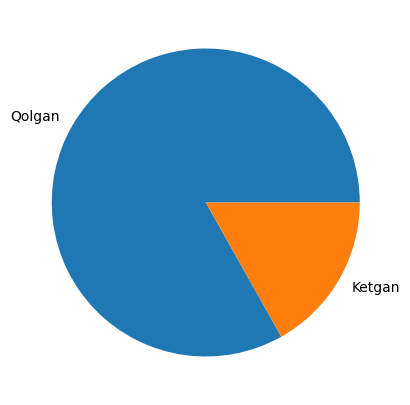

In [9]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan', 'Ketgan'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


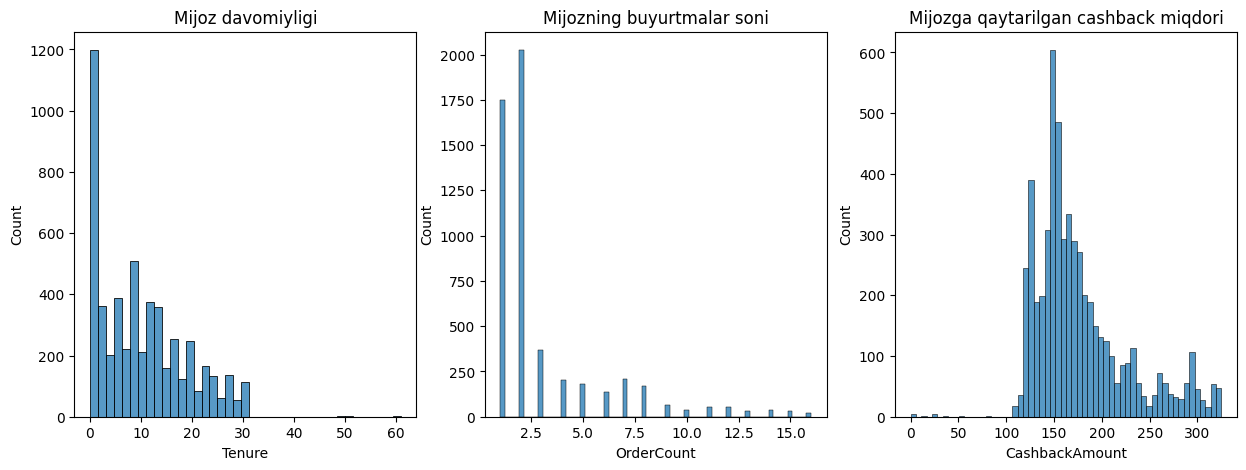

<Figure size 640x480 with 0 Axes>

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x='Tenure', data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

# OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Mijozning buyurtmalar soni")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")

plt.show()

plt.savefig('Graph.png')

# Kategoriyali ustunlarni tahlil qilamiz

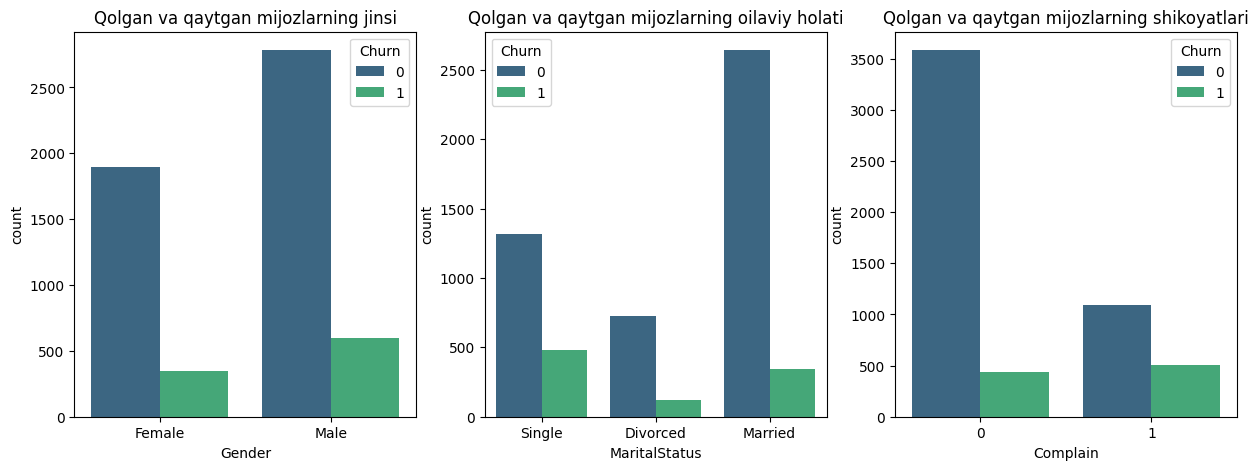

In [11]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozlarning oilaviy holati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Qolgan va qaytgan mijozlarning shikoyatlari")

plt.show()

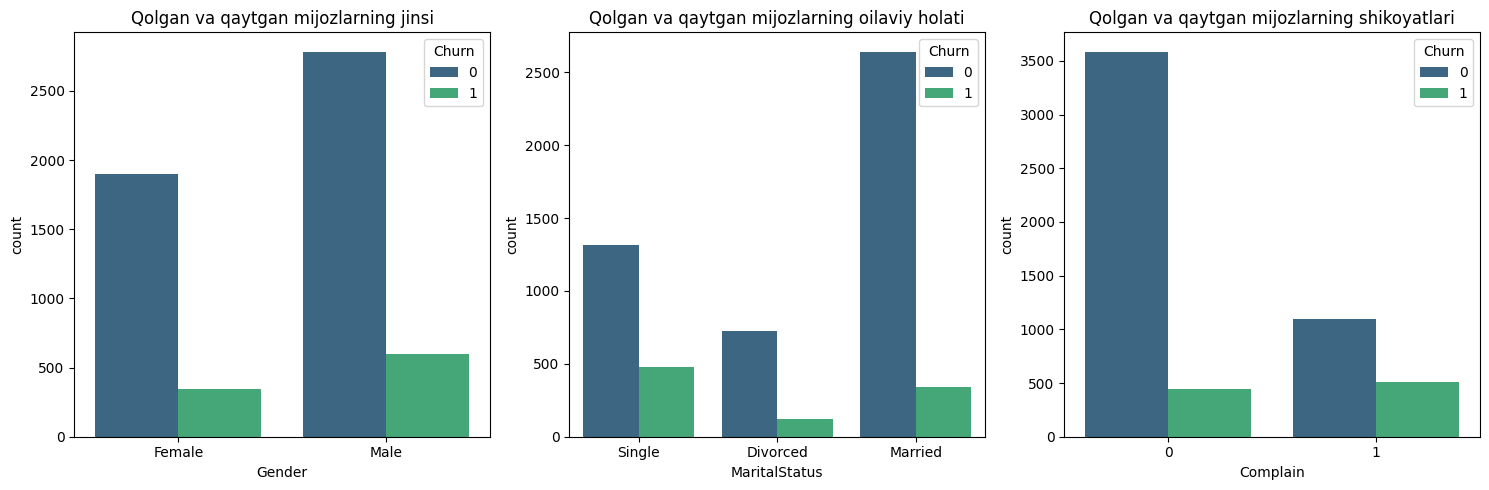

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplot yaratish
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Har bir grafikni chizish
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozlarning oilaviy holati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Qolgan va qaytgan mijozlarning shikoyatlari")

plt.tight_layout()  # Grafiklar orasidagi masofani moslash
plt.show()  # Grafiklarni ko‘rsatish

# Har bir subplotni alohida saqlash
for i, ax in enumerate(axes):
    fig = plt.figure(figsize=(5, 5))  # Yangi figura yaratish
    new_ax = fig.add_subplot(111)  # Yangi subplot qo‘shish
    for patch in ax.patches:  # Asl subplotdan ustunlarni nusxalash
        new_ax.bar(patch.get_x(), patch.get_height(), width=patch.get_width(), color=patch.get_facecolor(), label=patch.get_label())
    
    new_ax.set_title(ax.get_title())  # Asl sarlavhani o‘tkazish
    new_ax.set_xlabel(ax.get_xlabel())
    new_ax.set_ylabel(ax.get_ylabel())
    new_ax.legend()  # Legenda qo‘shish
    plt.savefig(f"subplot_{i+1}.png", dpi=300)  # Faylni saqlash
    plt.close(fig)  # Grafikni yopish


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [14]:
encoder = LabelEncoder()
df['PreferredLoginDevice'] = encoder.fit_transform(df['PreferredLoginDevice'].values)
df['PreferredLoginDevice'].value_counts()
df['PreferredPaymentMode'] = encoder.fit_transform(df['PreferredPaymentMode'].values)
df['PreferredPaymentMode'].value_counts()
df['Gender'] = encoder.fit_transform(df['Gender'].values)
df['Gender'].value_counts()
df['PreferedOrderCat'] = encoder.fit_transform(df['PreferedOrderCat'].values)
df['PreferedOrderCat'].value_counts()
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'].values)
df['MaritalStatus'].value_counts()

MaritalStatus
1    2986
2    1796
0     848
Name: count, dtype: int64

In [15]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,2,1,12.0,0,1,NaN,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


In [16]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
MaritalStatus                  0.140316
PreferedOrderCat               0.118922
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
Gender                         0.029264
OrderCount                     0.028697
PreferredPaymentMode           0.026519
CustomerID                     0.019083
HourSpendOnApp                 0.018675
PreferredLoginDevice           0.013281
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

# Ma'lumotlarga ishlov berish

In [17]:
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 1856
Mavjud bo'lmagan qatorlar soni: 1856
Mavjud bo'lmagan qatorlar %: 33.0%


In [18]:
data = df[['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'MaritalStatus', 'PreferedOrderCat']]
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0%


In [19]:
data = data.dropna()
data.shape

(5059, 7)

In [20]:
data['Churn'].value_counts()/len(data)

Churn
0    0.839296
1    0.160704
Name: count, dtype: float64

# ML ga tayyorgarlik

In [21]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# ML
# Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.72      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.81      0.68      0.71      1012
weighted avg       0.86      0.88      0.86      1012

Model aniqligi 0.8764822134387352


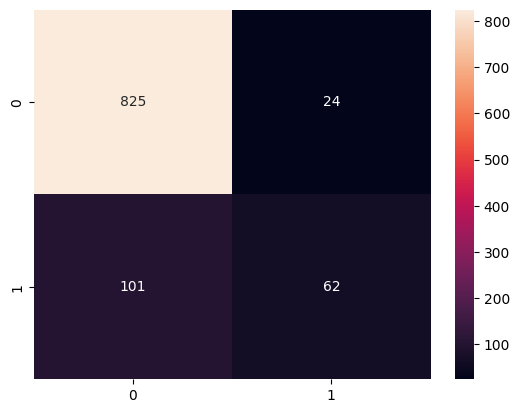

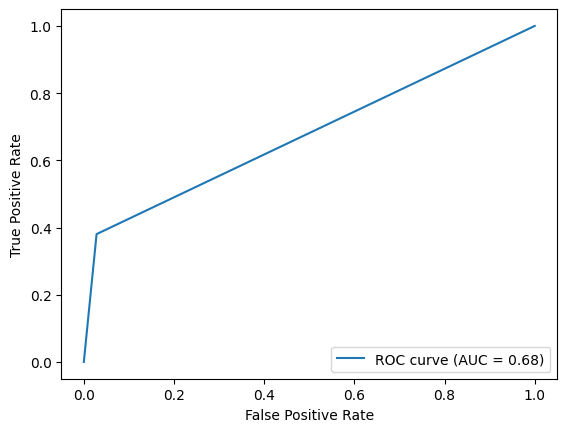

In [24]:
# Model yaratamiz
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = log_model.predict(X_test)
log_acc = "Model aniqligi", metrics.accuracy_score(y_test, y_predict)
log_acc
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.77      0.39      0.52       163

    accuracy                           0.88      1012
   macro avg       0.83      0.69      0.73      1012
weighted avg       0.87      0.88      0.87      1012

Model aniqligi 0.883399209486166


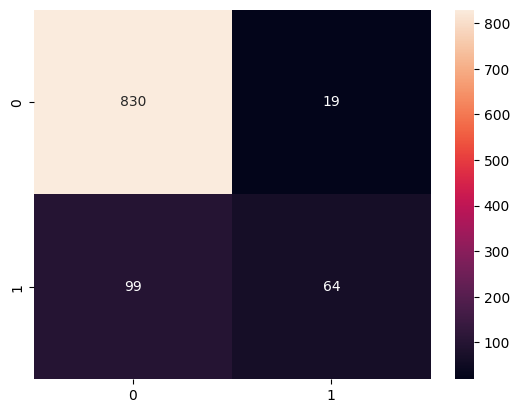

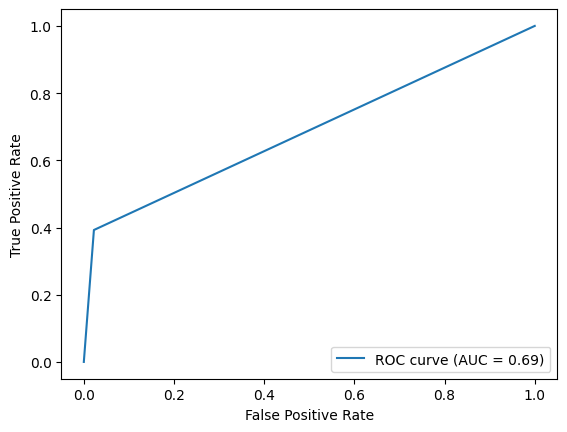

In [25]:
# Model yaratamiz
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = svm_model.predict(X_test)
svm_acc = "Model aniqligi", metrics.accuracy_score(y_test, y_predict)
svm_acc
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.84      0.90      0.87       163

    accuracy                           0.96      1012
   macro avg       0.91      0.94      0.92      1012
weighted avg       0.96      0.96      0.96      1012

Model aniqligi 0.9575098814229249


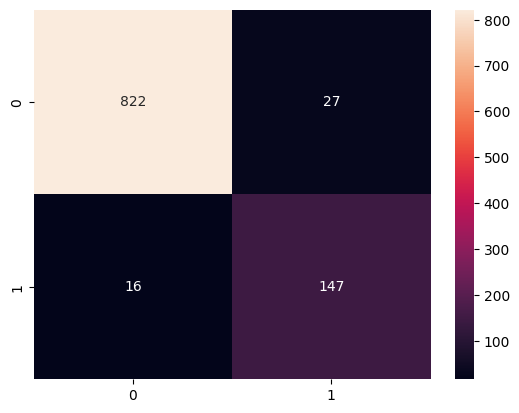

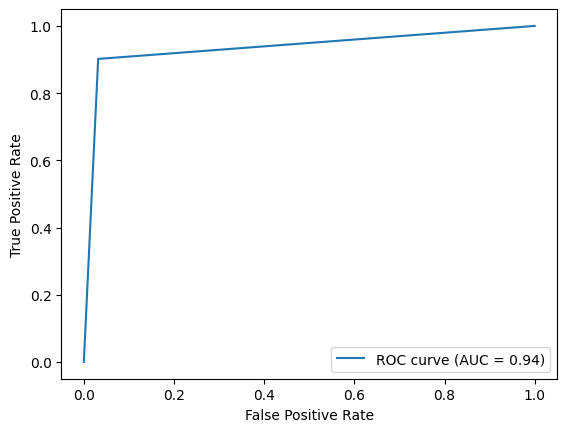

In [26]:
# Model yaratamiz
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = tree_model.predict(X_test)
tree_acc = "Model aniqligi", metrics.accuracy_score(y_test, y_predict)
tree_acc
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

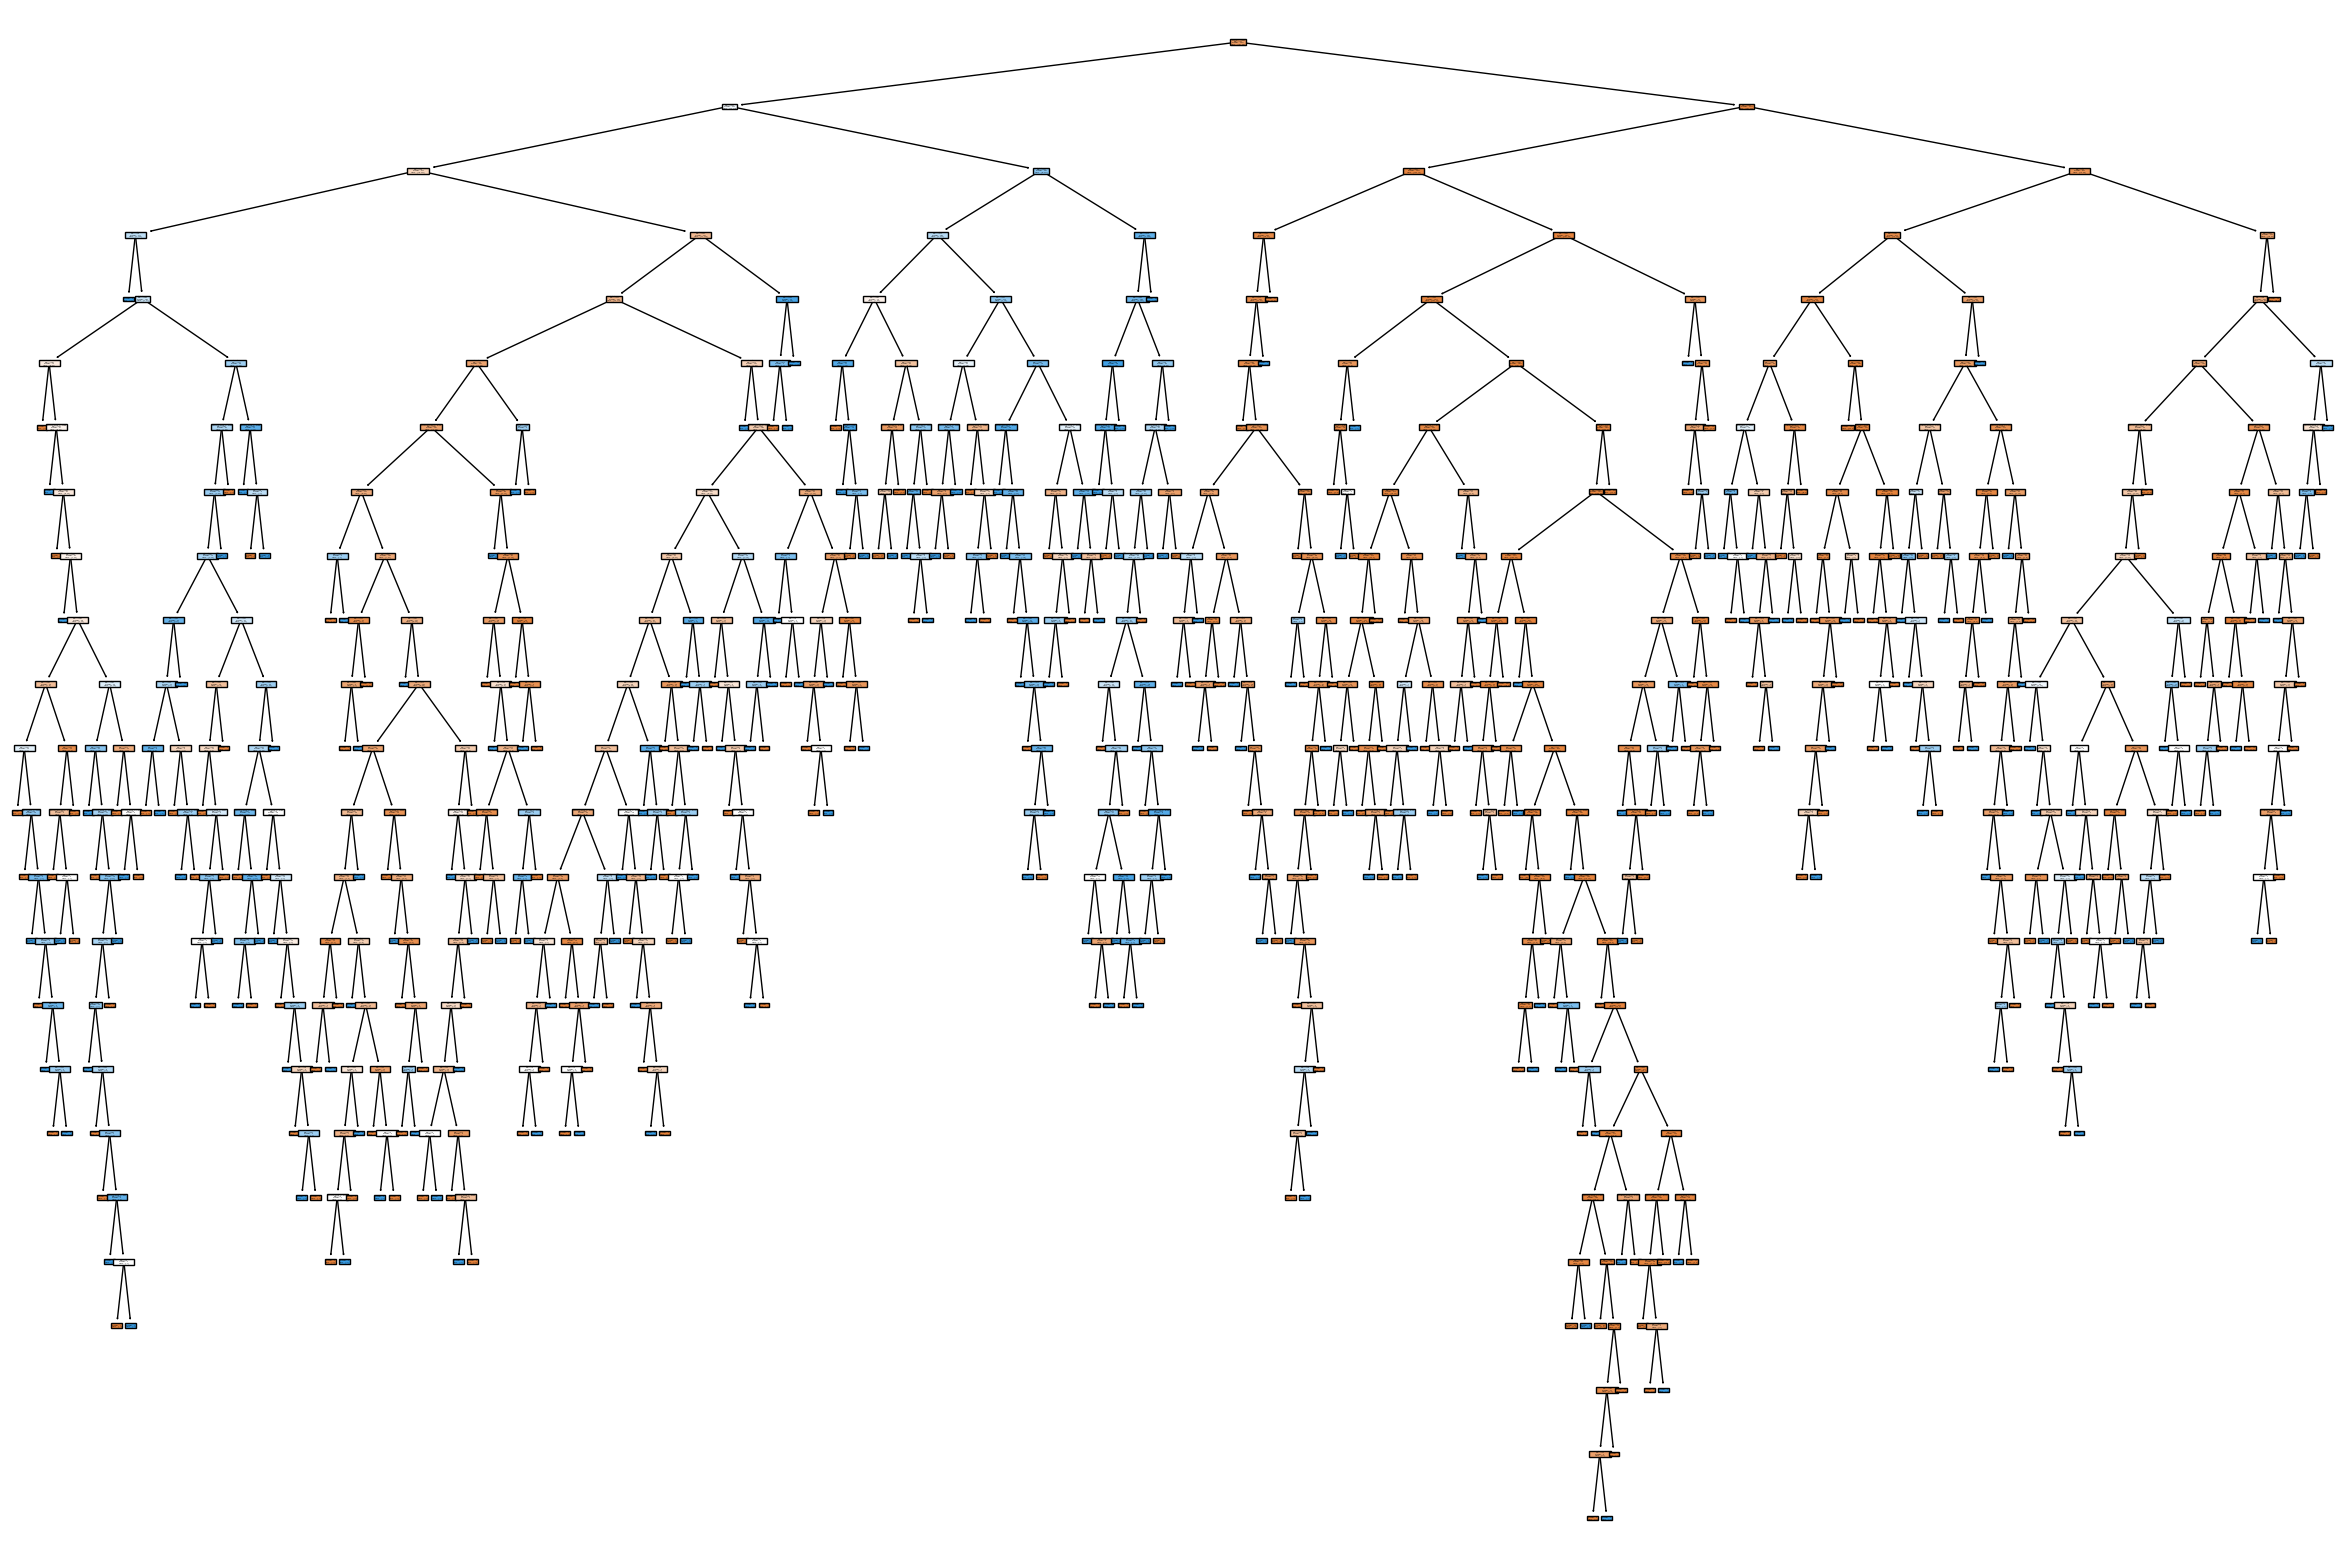

In [27]:
cols = data.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

In [28]:
param_grid = {'max_depth':np.arange(1,25)}
tree_gscv = GridSearchCV(tree_model, param_grid, cv=5)
tree_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [29]:
tree_gscv.best_params_

{'max_depth': 22}

In [30]:
tree_gscv.best_score_

0.9883377706884351

In [31]:
tree_gscv.cv_results_['rank_test_score']

array([24, 23, 22, 21, 20, 18, 19, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,
        7,  6,  4,  5,  1,  3,  2], dtype=int32)

# Random Forest

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.87      0.79      0.83       163

    accuracy                           0.95      1012
   macro avg       0.91      0.88      0.90      1012
weighted avg       0.95      0.95      0.95      1012

Model aniqligi 0.9466403162055336


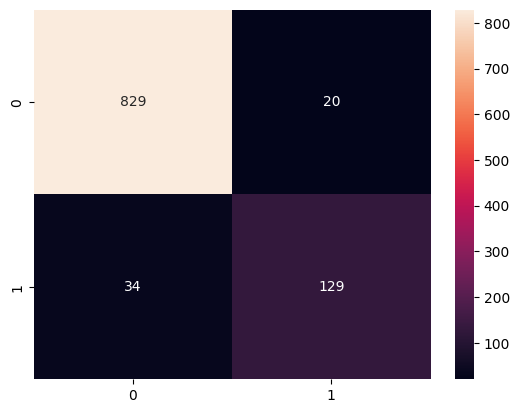

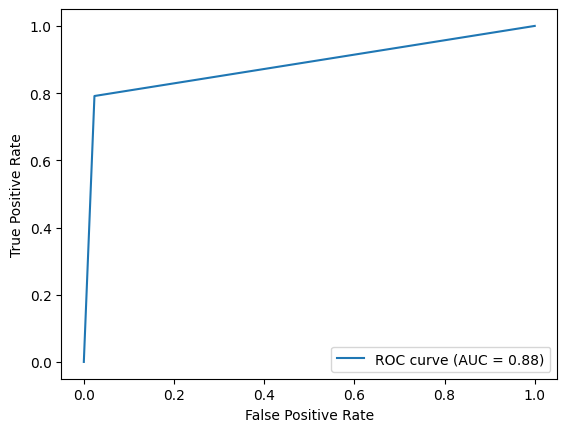

In [32]:
# Model yaratamiz
RF_model = RandomForestClassifier(n_estimators=50)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = RF_model.predict(X_test)
rf_acc = "Model aniqligi", metrics.accuracy_score(y_test, y_predict)
rf_acc
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# XGBoost

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       849
           1       0.86      0.75      0.80       163

    accuracy                           0.94      1012
   macro avg       0.91      0.86      0.88      1012
weighted avg       0.94      0.94      0.94      1012

Model aniqligi 0.9397233201581028


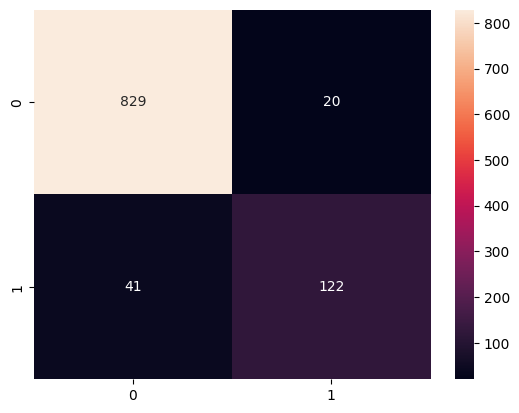

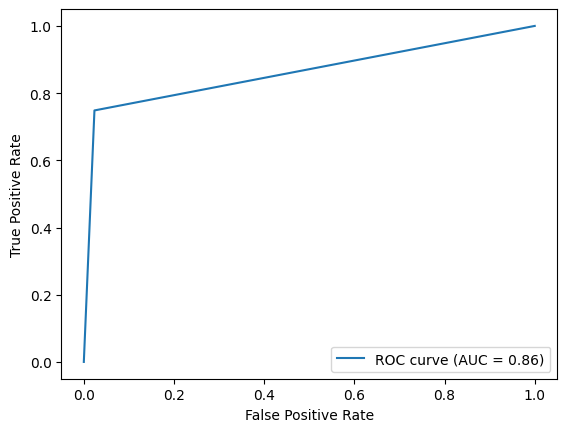

In [33]:
# Model yaratamiz
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = xgb_model.predict(X_test)
xgb_acc = "Model aniqligi", metrics.accuracy_score(y_test, y_predict)
xgb_acc
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [34]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines',  
              'Decision Tree', 'Random Forest', 'XGBOost'],
    'Score': [log_acc, svm_acc, tree_acc, 
              rf_acc, xgb_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,"(Model aniqligi, 0.9575098814229249)"
3,Random Forest,"(Model aniqligi, 0.9466403162055336)"
4,XGBOost,"(Model aniqligi, 0.9397233201581028)"
1,Support Vector Machines,"(Model aniqligi, 0.883399209486166)"
0,Logistic Regression,"(Model aniqligi, 0.8764822134387352)"
